<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01793672/blob/main/ActividadSemanal7_Regresiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CIENCIA Y ANALITICA DE DATOS**
---
#**Actividad Semanal 7 - Regresiones**
---
##**Alumno: Freddy Armendariz Herrera**
##**Matrícula: A01793672**
---
###**Profesor Titular:** Maria de la Paz Rico Fernandez

###**Profesor Tutor:** Juan Miguel Meza Méndez

###**Fecha:** 9 de Noviembre del 2022

---

# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [81]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

In [82]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [83]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

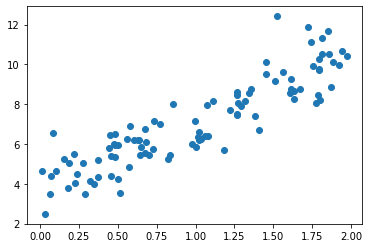

In [84]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [85]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [86]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [87]:
#X_fit[]

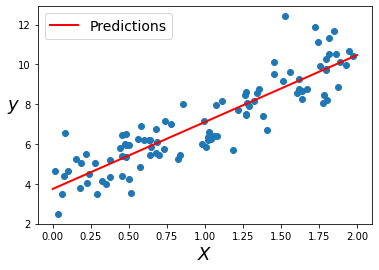

In [88]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [89]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [90]:
X_new.shape

(2, 1)

In [91]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [92]:
linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [93]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [94]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

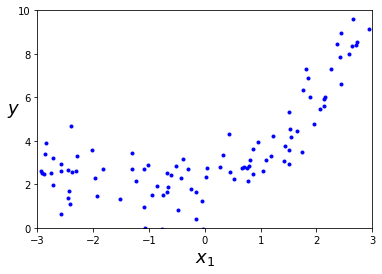

In [95]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [96]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [97]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [98]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [99]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [100]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [101]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

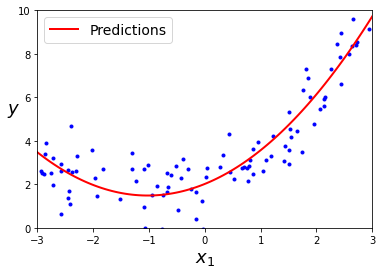

In [102]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


#**Ejercicio 1**

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [103]:
# Importacion de Librerias

# Tratamiento de los datos
import pandas as pd
import numpy as np
# Graficos
import seaborn as sbn
import matplotlib.pyplot as plt
# Preprocesado y Modelado
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

In [104]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
968,7.065653,27.804027
212,3.372115,41.127212
416,4.194513,43.832711
677,5.068888,41.225741
550,4.604122,37.569764
764,5.389522,31.191501
386,4.104190,42.988730
339,3.942214,46.291435
82,2.665856,48.578425
487,4.399514,37.567914


In [105]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [106]:
len(X)

1000

In [107]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

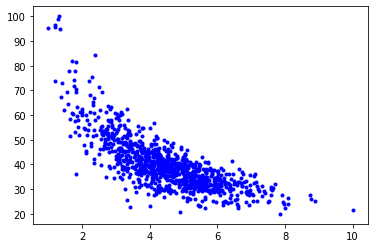

In [108]:
plt.plot(X,y,'b.')

In [109]:
# Division del conjunto de datos en entrenamiento y prueba

Xtv, Xtest, Ytv, Ytest = train_test_split(X, y, test_size=0.15, random_state=101)

In [110]:
# Definiesto listas para graficar errores

R2scores = list()
MAEscores = list()
Modelos = list()

###**Regresion Lineal**

In [111]:
# Declaracion y entramiento del modelo con los datos de entrenamiento

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(Xtv, Ytv)

LinearRegression()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


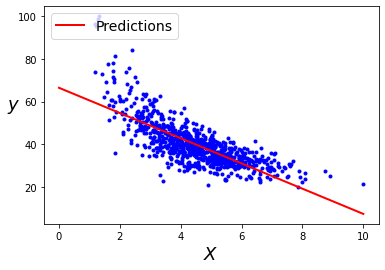

In [112]:
# Visualizacion de los datos de entrenamiento y predicciones

X_fit = np.linspace(0, 10, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis]) #Best fit line

plt.plot(Xtv, Ytv, "b.")
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

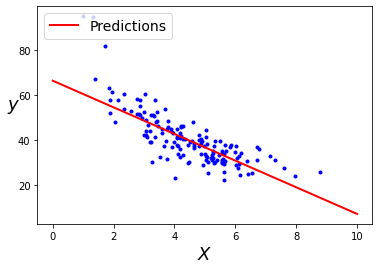

In [113]:
# Visualizacion del conjunto de prueba con su respectiva prediccion

plt.plot(Xtest, Ytest, "b.")
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [114]:
# Obtencion de coeficientes de la ecuacion

linear_reg.coef_, linear_reg.intercept_

(array([-5.91602323]), 66.44764675174278)

Modelo estimado:

$\hat{y} = -5.91X + 66.44$

In [115]:
# Impresion de errores y R2

Yhat = linear_reg.predict(Xtest)

Modelos.append("LINEAR")
MAE = metrics.mean_absolute_error(Ytest, Yhat)
MAEscores.append(MAE)
R2 = r2_score(Ytest, Yhat)
R2scores.append(R2)

print("Error Medio Absoluto (MAE):", MAE)
print("Raiz del Error Cuadratico Medio (RMSE):", np.sqrt(metrics.mean_squared_error(Ytest, Yhat)))
print("R2 Score:",R2)

Error Medio Absoluto (MAE): 5.011595088997378
Raiz del Error Cuadratico Medio (RMSE): 7.2416891490838875
R2 Score: 0.6171440942171167


###**Regresion Polinomial**

In [116]:
# Declaracion y entramiento del modelo con los datos de entrenamiento
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(Xtv)
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, Ytv)

LinearRegression()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


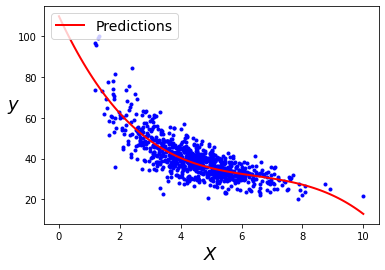

In [117]:
# Visualizacion de los datos de entrenamiento con su respectiva prediccion

X_new=np.linspace(0, 10, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(Xtv, Ytv, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

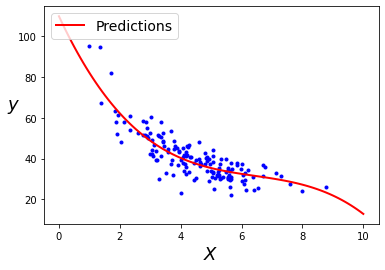

In [118]:
# Visualizacion del conjunto de prueba con su respectiva prediccion

plt.plot(Xtest, Ytest, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [119]:
# Obtencion de coeficientes de la ecuacion

lin_reg.coef_, lin_reg.intercept_

(array([-32.08539532,   4.64944257,  -0.24083281]), 109.66676794354896)

Modelo estimado:

$\hat{y} = -32.08X + 4.64X^2 - 0.24X^3 + 109.66$

In [120]:
# Impresion de errores y R2
X_poly2 = poly_features.fit_transform(Xtest)
Yhat2 = lin_reg.predict(X_poly2)

Modelos.append("POLYNOMIAL")
MAE = metrics.mean_absolute_error(Ytest, Yhat2)
MAEscores.append(MAE)
R2 = r2_score(Ytest, Yhat2)
R2scores.append(R2)

print("Error Medio Absoluto (MAE):", MAE)
print("Raiz del Error Cuadratico Medio (RMSE):", np.sqrt(metrics.mean_squared_error(Ytest, Yhat2)))
print("R2 Score:", R2)

Error Medio Absoluto (MAE): 4.4500042258509245
Raiz del Error Cuadratico Medio (RMSE): 5.751908180228318
R2 Score: 0.7584653276691175


###**Regresion Lasso**

In [121]:
# Declaracion y entramiento del modelo con los datos de entrenamiento
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(Xtv)
lin_reg = Lasso()
lin_reg.fit(X_poly, Ytv)

Lasso()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


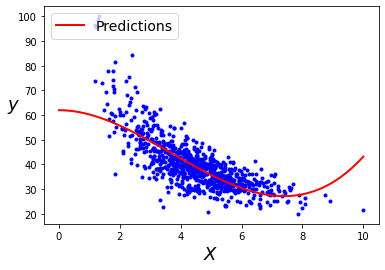

In [122]:
# Visualizacion de los datos de entrenamiento con su respectiva prediccion

X_new=np.linspace(0, 10, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(Xtv, Ytv, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

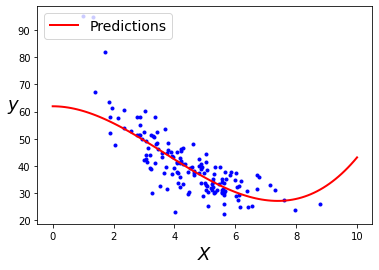

In [123]:
# Visualizacion del conjunto de prueba con su respectiva prediccion

plt.plot(Xtest, Ytest, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [124]:
# Obtencion de coeficientes de la ecuacion

lin_reg.coef_, lin_reg.intercept_

(array([-0.        , -1.90795078,  0.17200469]), 61.97797497383886)

Modelo estimado:

$\hat{y} = -1.90X^2 + 0.17X^3 + 61.97$

In [125]:
# Impresion de errores y R2
X_poly2 = poly_features.fit_transform(Xtest)
Yhat2 = lin_reg.predict(X_poly2)

Modelos.append("LASSO")
MAE = metrics.mean_absolute_error(Ytest, Yhat2)
MAEscores.append(MAE)
R2 = r2_score(Ytest, Yhat2)
R2scores.append(R2)

print("Error Medio Absoluto (MAE):", MAE)
print("Raiz del Error Cuadratico Medio (RMSE):", np.sqrt(metrics.mean_squared_error(Ytest, Yhat2)))
print("R2 Score:", R2)

Error Medio Absoluto (MAE): 4.717445206739946
Raiz del Error Cuadratico Medio (RMSE): 7.001114471546805
R2 Score: 0.6421591221376561


###**Regresion Ridge**

In [126]:
# Declaracion y entramiento del modelo con los datos de entrenamiento
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(Xtv)
lin_reg = Ridge()
lin_reg.fit(X_poly, Ytv)

Ridge()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


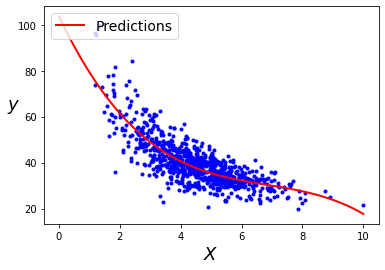

In [127]:
# Visualizacion de los datos de entrenamiento con su respectiva prediccion

X_new=np.linspace(0, 10, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(Xtv, Ytv, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

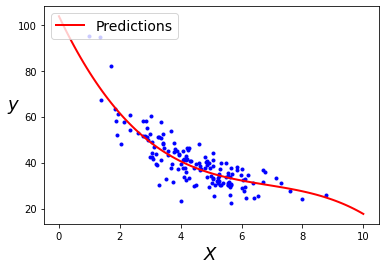

In [128]:
# Visualizacion del conjunto de prueba con su respectiva prediccion

plt.plot(Xtest, Ytest, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [129]:
# Obtencion de coeficientes de la ecuacion

lin_reg.coef_, lin_reg.intercept_

(array([-27.92280917,   3.77232697,  -0.18402499]), 103.68561057739838)

Modelo estimado:

$\hat{y} = -27.92X + 3.77X^2 - 0.18X^3 + 103.68$

In [130]:
# Impresion de errores y R2
X_poly2 = poly_features.fit_transform(Xtest)
Yhat2 = lin_reg.predict(X_poly2)

Modelos.append("RIDGE")
MAE = metrics.mean_absolute_error(Ytest, Yhat2)
MAEscores.append(MAE)
R2 = r2_score(Ytest, Yhat2)
R2scores.append(R2)

print("Error Medio Absoluto (MAE):", MAE)
print("Raiz del Error Cuadratico Medio (RMSE):", np.sqrt(metrics.mean_squared_error(Ytest, Yhat2)))
print("R2 Score:", R2)

Error Medio Absoluto (MAE): 4.41744377258077
Raiz del Error Cuadratico Medio (RMSE): 5.809167548481944
R2 Score: 0.7536325102129533


###**Grafica MAE Scores**

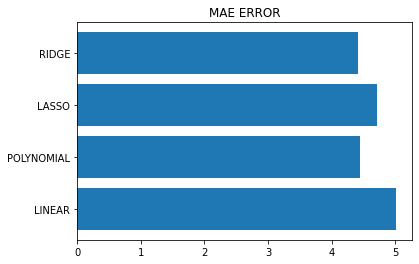

In [131]:
plt.barh(Modelos, MAEscores)
plt.title("MAE ERROR")
plt.show()

###**Grafica RMSE Scores**

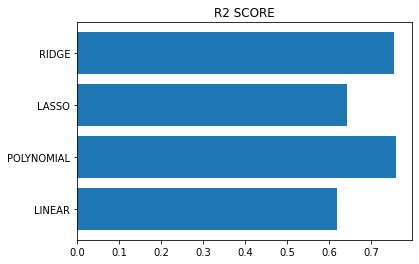

In [132]:
plt.barh(Modelos, R2scores)
plt.title("R2 SCORE")
plt.show()

###**Resultados**

Quisiera hacer enfasis en que obtuve mejores resultados entrenando a mis modelos con funciones polinomiales de tercer grado, transformando asi mi entrada en X2 y X3 y fue asi como obtuve y valide los modelos, ademas, de acuerdo a la distribucion de los datos graficamente utilizando 3 grados se adapta mejor.

**¿Que metodo conviene mas a la empresa?, ¿Por que?**

Conviene mas utilizar la regresion de Ridge y con ella hacer las prediccion ya que es la que mejor se comporta y segun su grafica se adapta mas a los datos, sigue su trayectoria y generaliza, ademas obtuvo los mejores puntajes en cuanto a errores.

**¿Que porcentajes de entrenamiento y evaluacion usaste?**

El conjunto de entrenamiento quedo con un 85% del total de los datos y el conjunto de validacion obtuvo un 15%.

**¿Que error tienes?, ¿Es bueno?, ¿Como lo sabes?**

Los mejores resultados se obtuvieron con dos modelos en particular, Regresion Polinomial y Ridge, pero de estos dos, el mejor es Ridge ya que a pesar de que tienen resultados muy similares, en cuanto a MAE error, Ridge cuenta con 4.41 mientras que Polinomial tiene 4.45 en este error, entonces a menor error se obtiene un mejor resultado.

Al igual, en cuanto a R2 Score, ambos modelos estan empatados con 0.75 y segun se tiene entendido esta metrica evalua la correlacion existente entre los datos de entrada y la salida, es decir, mientras mas cercano sea de 1, mejor es el modelo y considero que este valor es lo suficientemente apto como para decir que el modelo no esta ni subentrenado ni sobreentrenado.

#**Ejercicio 2**
Realiza la regresión polinomial de los siguientes datos:

In [133]:
# Importacion de Librerias

# Tratamiento de los datos
import pandas as pd
import numpy as np
# Graficos
import seaborn as sbn
import matplotlib.pyplot as plt
# Preprocesado y Modelado
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

In [134]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5954,7852020250,20140602T000000,725995.0,4,2.50,3190,7869,2.0,0,2,...,9,3190,0,2001,0,98065,47.5317,-121.866,2630,6739
8610,6392002020,20150324T000000,559000.0,3,1.75,1700,6500,1.0,0,0,...,8,1700,0,1967,0,98115,47.6837,-122.284,1880,6000
7650,626049058,20150504T000000,275000.0,5,2.50,2570,17234,1.0,0,0,...,7,1300,1270,1959,0,98133,47.7753,-122.355,1760,7969
5683,2202500255,20150305T000000,335000.0,3,2.00,1210,9926,1.0,0,0,...,7,1210,0,1954,2015,98006,47.5731,-122.135,1690,9737
20773,7304301231,20140617T000000,345000.0,3,2.50,1680,2229,2.0,0,0,...,7,1680,0,2007,0,98155,47.7484,-122.322,1230,9300
6959,723000114,20140505T000000,1395000.0,5,3.50,4010,8510,2.0,0,1,...,9,2850,1160,1971,0,98105,47.6578,-122.286,2610,6128
10784,4104900340,20150204T000000,710000.0,4,2.50,3220,18618,2.0,0,1,...,10,3220,0,1991,0,98056,47.5326,-122.181,2650,11896
21529,2487200490,20140623T000000,670000.0,3,2.50,3310,5300,2.0,0,2,...,8,2440,870,2008,0,98136,47.5178,-122.389,2140,7500
12319,2386000070,20141029T000000,795127.0,4,3.25,4360,91158,1.0,0,0,...,10,3360,1000,1993,0,98053,47.6398,-121.985,3540,90940
19948,293070090,20140711T000000,859990.0,4,2.75,3520,5500,2.0,0,0,...,9,3520,0,2014,0,98074,47.6181,-122.056,3340,5500


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [136]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [137]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)

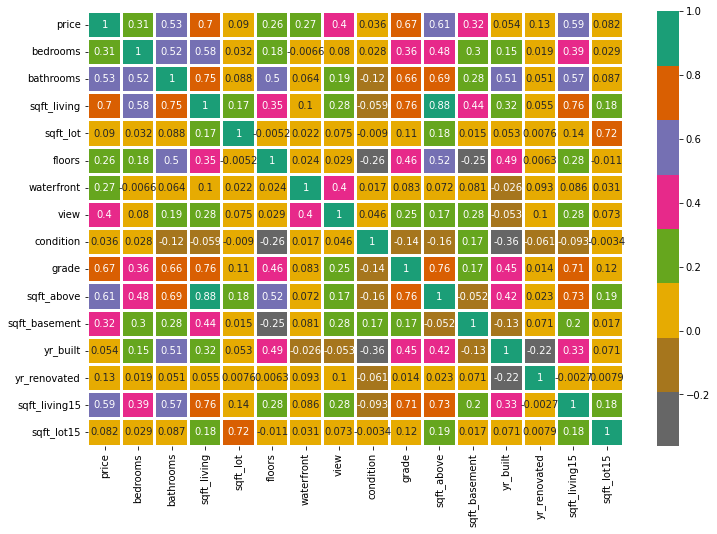

In [138]:
plt.figure(figsize=(12,8)) 
sbn.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [139]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [140]:
# Division del conjunto de datos en entrenamiento y prueba

Xtv, Xtest, Ytv, Ytest = train_test_split(X, y, test_size=0.15, random_state=101)

In [141]:
# Definiesto listas para graficar errores

R2scores = list()
MAEscores = list()
Modelos = list()

###**Regresion Lineal**

In [142]:
# Declaracion y entramiento del modelo con los datos de entrenamiento

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(Xtv, Ytv)

LinearRegression()

Modelo estimado:

In [143]:
# Obtencion de coeficientes de la ecuacion

linear_reg.coef_, linear_reg.intercept_

(array([[-3.73751724e+04,  4.09137429e+04,  1.07983503e+02,
          2.65943294e-02,  3.00967138e+04,  5.55098920e+05,
          4.27034862e+04,  2.26220818e+04,  1.20043719e+05,
          4.93040986e+01,  5.86794045e+01, -3.50286379e+03,
          1.23828281e+01,  2.62592311e+01, -5.54590727e-01]]),
 array([6051129.2749005]))

In [144]:
# Impresion de errores y R2

Yhat = linear_reg.predict(Xtest)

Modelos.append("LINEAR")
MAE = metrics.mean_absolute_error(Ytest, Yhat)
MAEscores.append(MAE)
R2 = r2_score(Ytest, Yhat)
R2scores.append(R2)

print("Error Medio Absoluto (MAE):", MAE)
print("Raiz del Error Cuadratico Medio (RMSE):", np.sqrt(metrics.mean_squared_error(Ytest, Yhat)))
print("R2 Score:",R2)

Error Medio Absoluto (MAE): 137983.48059565123
Raiz del Error Cuadratico Medio (RMSE): 223814.68519545012
R2 Score: 0.6644576349821927


###**Regresion Polinomial**

In [145]:
# Declaracion y entramiento del modelo con los datos de entrenamiento
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(Xtv, Ytv)

LinearRegression()

Modelo estimado:

In [146]:
# Obtencion de coeficientes de la ecuacion

lin_reg.coef_, lin_reg.intercept_

(array([[-3.73751724e+04,  4.09137429e+04,  1.07983503e+02,
          2.65943294e-02,  3.00967138e+04,  5.55098920e+05,
          4.27034862e+04,  2.26220818e+04,  1.20043719e+05,
          4.93040986e+01,  5.86794045e+01, -3.50286379e+03,
          1.23828281e+01,  2.62592311e+01, -5.54590727e-01]]),
 array([6051129.2749005]))

In [147]:
# Impresion de errores y R2
Yhat2 = lin_reg.predict(Xtest)

Modelos.append("POLYNOMIAL")
MAE = metrics.mean_absolute_error(Ytest, Yhat2)
MAEscores.append(MAE)
R2 = r2_score(Ytest, Yhat2)
R2scores.append(R2)

print("Error Medio Absoluto (MAE):", MAE)
print("Raiz del Error Cuadratico Medio (RMSE):", np.sqrt(metrics.mean_squared_error(Ytest, Yhat2)))
print("R2 Score:", R2)

Error Medio Absoluto (MAE): 137983.48059565123
Raiz del Error Cuadratico Medio (RMSE): 223814.68519545012
R2 Score: 0.6644576349821927


###**Regresion Lasso**

In [148]:
# Declaracion y entramiento del modelo con los datos de entrenamiento
lin_reg = Lasso()
lin_reg.fit(Xtv, Ytv)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.839e+14, tolerance: 2.429e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Lasso()

Modelo estimado:

In [149]:
# Obtencion de coeficientes de la ecuacion

lin_reg.coef_, lin_reg.intercept_

(array([-3.73738883e+04,  4.09094967e+04,  2.94480999e+02,  2.65862722e-02,
         3.00922127e+04,  5.54949576e+05,  4.27090592e+04,  2.26193014e+04,
         1.20042391e+05, -1.37188772e+02, -1.27816282e+02, -3.50281427e+03,
         1.23854346e+01,  2.62586541e+01, -5.54593030e-01]),
 array([6051054.78700261]))

In [150]:
# Impresion de errores y R2
Yhat2 = lin_reg.predict(Xtest)

Modelos.append("LASSO")
MAE = metrics.mean_absolute_error(Ytest, Yhat2)
MAEscores.append(MAE)
R2 = r2_score(Ytest, Yhat2)
R2scores.append(R2)

print("Error Medio Absoluto (MAE):", MAE)
print("Raiz del Error Cuadratico Medio (RMSE):", np.sqrt(metrics.mean_squared_error(Ytest, Yhat2)))
print("R2 Score:", R2)

Error Medio Absoluto (MAE): 137983.78813945354
Raiz del Error Cuadratico Medio (RMSE): 223815.40321487677
R2 Score: 0.6644554820732108


###**Regresion Ridge**

In [151]:
# Declaracion y entramiento del modelo con los datos de entrenamiento
lin_reg = Ridge()
lin_reg.fit(Xtv, Ytv)

Ridge()

Modelo estimado:

In [152]:
# Obtencion de coeficientes de la ecuacion

lin_reg.coef_, lin_reg.intercept_

(array([[-3.73939164e+04,  4.08981081e+04,  1.08005243e+02,
          2.63659309e-02,  3.00945488e+04,  5.50406959e+05,
          4.29198685e+04,  2.26263025e+04,  1.20021491e+05,
          4.93382158e+01,  5.86666616e+01, -3.50249277e+03,
          1.24437564e+01,  2.62369171e+01, -5.54428497e-01]]),
 array([6050576.17914102]))

In [153]:
# Impresion de errores y R2
Yhat2 = lin_reg.predict(Xtest)

Modelos.append("RIDGE")
MAE = metrics.mean_absolute_error(Ytest, Yhat2)
MAEscores.append(MAE)
R2 = r2_score(Ytest, Yhat2)
R2scores.append(R2)

print("Error Medio Absoluto (MAE):", MAE)
print("Raiz del Error Cuadratico Medio (RMSE):", np.sqrt(metrics.mean_squared_error(Ytest, Yhat2)))
print("R2 Score:", R2)

Error Medio Absoluto (MAE): 137992.3944181033
Raiz del Error Cuadratico Medio (RMSE): 223835.99554556492
R2 Score: 0.6643937351028203


###**Grafica MAE Scores**

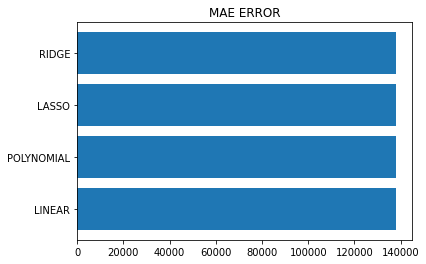

In [154]:
plt.barh(Modelos, MAEscores)
plt.title("MAE ERROR")
plt.show()

###**Grafica RMSE Scores**

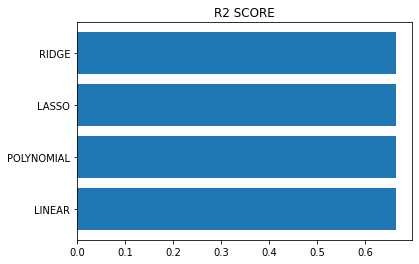

In [155]:
plt.barh(Modelos, R2scores)
plt.title("R2 SCORE")
plt.show()

###**Resultados**

No se obtuvieron los resultados esperados ya que el conjunto de datos de entrada estaba conformado por diferentes variables, mismas que no recibieron ninguna transformacion ni normalizacion antes de ser procesados. Debido a los diferentes rangos entre cada una de las diferentes variables de entrada, los modelos no fueron capaces de entrenarse adecuadamente. Se recomienda aplicar un preprocesamiento a los datos y hasta un PCA para reducir las dimensiones del mismo.

**¿Que metodo conviene mas a la empresa?, ¿Por que?**

Se concluye que ninguno es buen modelo ya que se requieren aplicar un preprocesamiento a los datos. Los cuatro modelos presentaron un error MAE elevado e igual, ademas su R2 Score solo llego por encima de 0.6 y todos obtuvieron la misma ponderacion.

**¿Que porcentajes de entrenamiento y evaluacion usaste?**

El conjunto de entrenamiento quedo con un 85% del total de los datos y el conjunto de validacion obtuvo un 15%.

**¿Que error tienes?, ¿Es bueno?, ¿Como lo sabes?**

Los errores obtenidos por los cuatro modelos son casi iguales, por lo tanto no se puede decidir cual es el mejor, se requiere aplicarle alguna transformacion a los datos de entrada.